In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from IPython import display
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
os.chdir('C:/Files/parkinson/PatientDataV2/')

In [11]:
patients = os.listdir()

In [13]:
patients[42:]

['patient41',
 'patient42',
 'patient43',
 'patient44',
 'patient45',
 'patient46',
 'patient47',
 'patient48',
 'patient49',
 'patient50',
 'patient51',
 'patient52',
 'patient53',
 'patient54',
 'patient55',
 'patient56',
 'patient57',
 'patient58',
 'patient59',
 'patient60',
 'patient61',
 'patient62',
 'patient63',
 'patient64',
 'patient65',
 'patient66',
 'patient67',
 'patient68',
 'patient69']

In [16]:
for patient in patients[42:]:
    print(patient)
    if '.' in patient:
        continue
    repeat_indexs = os.listdir('C:/Files/parkinson/PatientDataV2/' + patient)
    for repeat in repeat_indexs:
        if '.' in repeat:
            continue
        files = os.listdir('C:/Files/parkinson/PatientDataV2/' + patient + '/' + repeat)
        for file in files:
            if '.csv' not in file:
                continue
            os.makedirs('C:/Files/parkinson/PatientData_only_csv/' + patient + '/' + repeat, exist_ok= True)
            df = pd.read_csv('C:/Files/parkinson/PatientDataV2/' + patient + '/' + repeat + '/' + file)
            df.to_csv('C:/Files/parkinson/PatientData_only_csv/' + patient + '/' + repeat + '/' + file)
#             break
#         break
#     break

patient41
patient42
patient43
patient44
patient45
patient46
patient47
patient48
patient49
patient50
patient51
patient52
patient53
patient54
patient55
patient56
patient57
patient58
patient59
patient60
patient61
patient62
patient63
patient64
patient65
patient66
patient67
patient68
patient69


In [2]:
# os.chdir(path)
file = pd.read_pickle('C:/Files/parkinson/data.pkl')

In [17]:
train_features = pd.read_pickle('C:/Files/parkinson/train_features_500points_50overlap_new.pkl')
test_features = pd.read_pickle('C:/Files/parkinson/test_features_500points_50overlap_new.pkl')

train_features = train_features.fillna(4)
test_features = test_features.fillna(4)
features = train_features.append(test_features, ignore_index = True)

In [21]:
for exer in range(1,16):
    print(exer)
    print(features[(features.exercise_index == exer)*(features.target != 3)*(features.target != 0)*(features.target != 4)].name.unique())

1
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 54]
2
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
3
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
4
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 40 42 43 47 48 52 54]
5
[53 51 37 35 41 59 23 50 20 58 60 56 39 29 24 33 34 40 42 43 47 48 52 54]
6
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
7
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
8
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
9
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
10
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
11
[53 51 37 35 41 59 23 50 20 58 60 56 45 39 29 24 33 34 40 42 43 47 48 52
 54]
12
[53 51 37 35 59 23 50 20 58 60 56 45 39 29 24 33 34 42 43 47 48 52 54]
13
[53 51 37 35 41 59 50 58 60 56 45 39 29 33 34 40 42 4

In [134]:
Parkinson_total_df = features[features['target'] != 3]
corr = Parkinson_total_df.corr()
features_names = [name for name in Parkinson_total_df.columns if np.abs(corr['target'][name]) > 0.1]
Parkinson_total_df =Parkinson_total_df[features_names]

In [136]:
X = Parkinson_total_df.drop(columns= ['target', 'exercise_index', 'name'])
y = Parkinson_total_df['target'].values

In [150]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE
pca = PCA(n_components=10)
X_transf = pca.fit_transform(X.values[:10000])

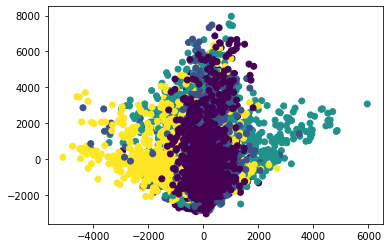

In [151]:
plt.scatter(X_transf[:,2], X_transf[:,1], c= y[:10000] )

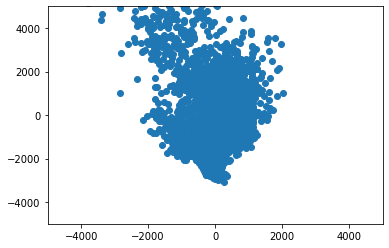

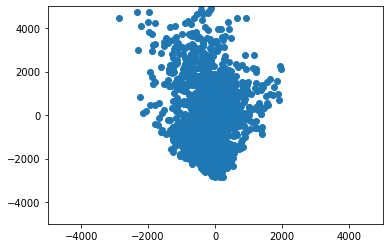

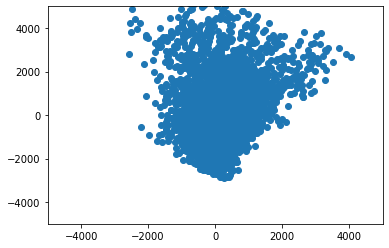

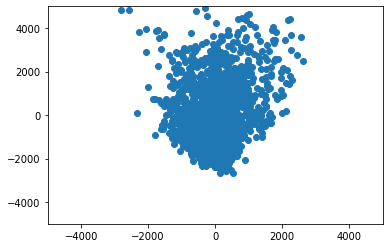

In [153]:
for i in np.unique(y[:10000]):
    plt.figure()
    xx = X_transf[y[:10000] == i][:,3]
    yy = X_transf[y[:10000] == i][:,1]

    plt.scatter(xx, yy)
    plt.xlim(-5000,5000)
    
    plt.ylim(-5000,5000)
    